In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 2.1 Relational Plots and SubPlots

<ul>
    <li><b>Scatter Plot</b></li>
    <li><b>Line Plot</b></li>
</ul>



<ul> 
     <li> Relational Plots lets you create subplots in a single figure </li>
     <li> Create relational plots using: <b>scatter plots or line plots</b> </li>
     <li> sns.scatterplot() vs sns.relplot(kind='scatter') </li>
</ul>

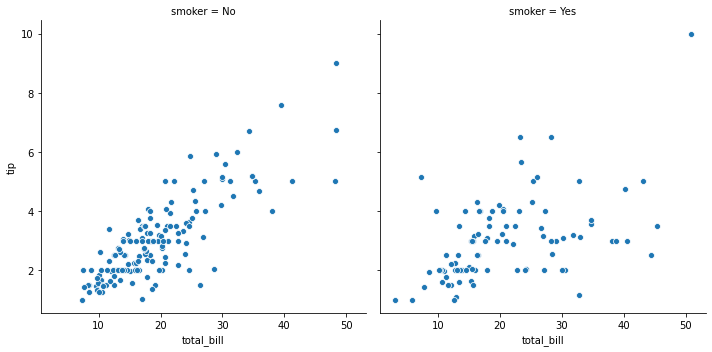

In [3]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='smoker', col_order=['No', 'Yes'])

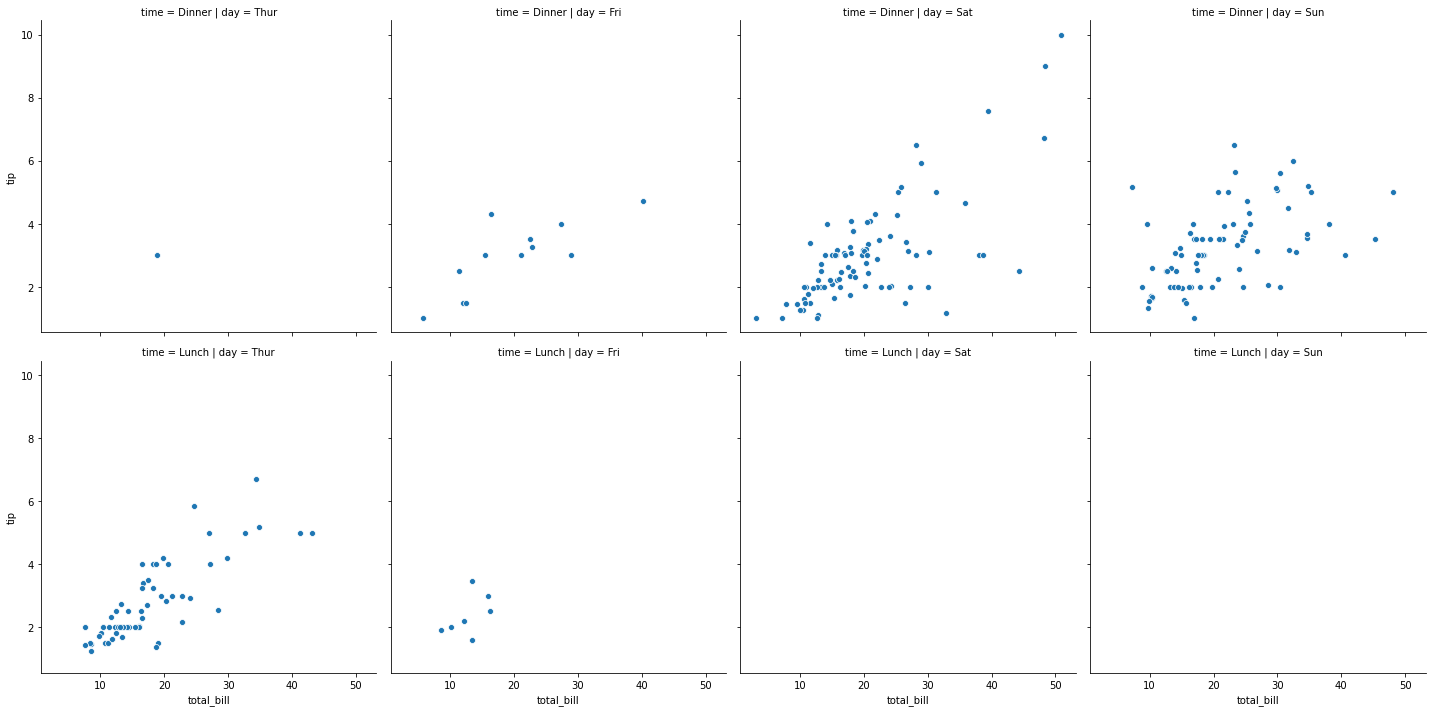

In [4]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='day', row='time', 
            col_order=['Thur', 'Fri', 'Sat', 'Sun'], row_order=['Dinner', 'Lunch'])

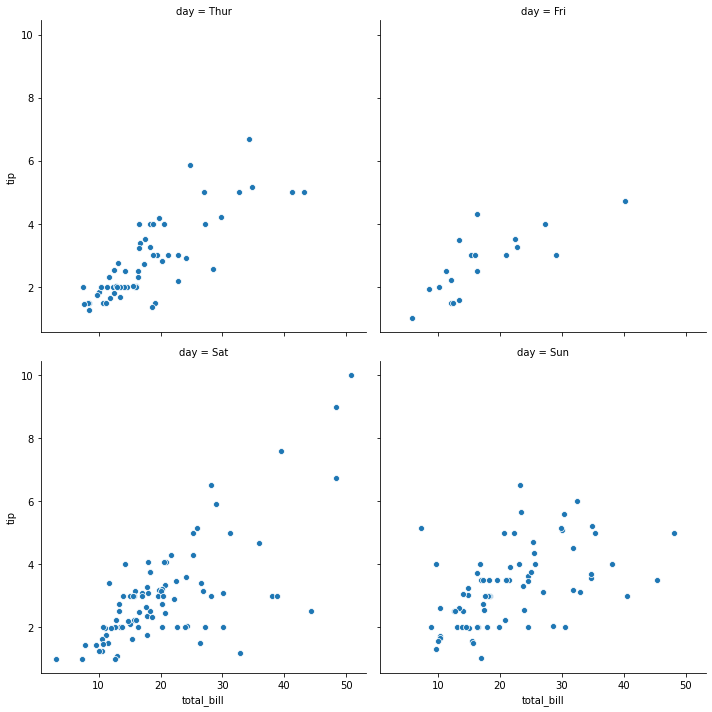

In [5]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='day', col_order=['Thur', 'Fri', 'Sat', 'Sun'], 
            col_wrap=2)

### 2.2 Customizing Scatter Plots

The following customizations can be used both on <b>sns.scatterplot</b> (or) <b>sns.relplot</b>
<ul>
<li>0. <b>Color</b> of scatter points using HUE</li>
<li>1. <b>Size</b> of scatter points using size=</li>
<li>2. <b>Style</b> of scatter points using style=</li>
<li>2. <b>Transparency</b> of scatter points using alpha=</li>
</ul>

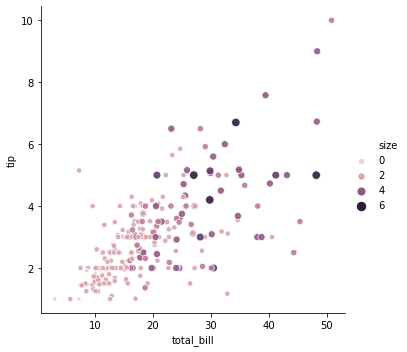

In [6]:
# if a quantitative variable is used for Hue color, it uses different shades of a single color
# if a categorical variable is used for Hie color, it uses different colors for each categorical value
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', hue='size', size='size', alpha=0.9)

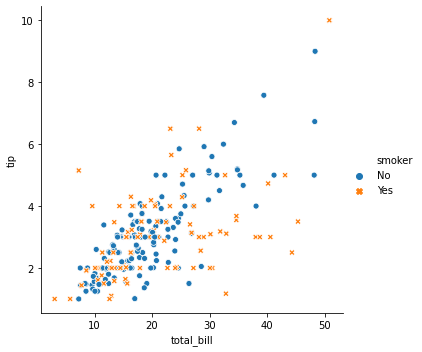

In [7]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', style='smoker', hue='smoker')

### 2.3 Introduction to Line Plots

In [8]:
df = pd.read_csv('C:/Users/4019/PycharmProjects/DS/DC/CT_DS/08_Introduction_to_Data_Visualization_with_Matplotlib/DataSets/climate_change.csv'
                 , index_col='date', parse_dates=['date'])
nineties = df['1990-01-06':'1999-12-06']
nineties.reset_index(inplace=True)
nineties_top10 = nineties[:10]
nineties_top10['location'] = ['south', 'north', 'east', 'west', 'south', 'north', 'east', 'west','south', 'north']
nineties_top10

<ipython-input-8-6441e2c09926>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nineties_top10['location'] = ['south', 'north', 'east', 'west', 'south', 'north', 'east', 'west','south', 'north']


,date,co2,relative_temp,location
0,1990-01-06,353.80,0.41,south
1,1990-02-06,355.04,0.41,north
2,1990-03-06,355.73,0.76,east
3,1990-04-06,356.32,0.55,west
4,1990-05-06,357.32,0.46,south
5,1990-06-06,356.34,0.38,north
6,1990-07-06,354.84,0.44,east
7,1990-08-06,353.01,0.30,west
8,1990-09-06,351.31,0.30,south
9,1990-10-06,351.62,0.43,north


(array([726468., 726499., 726527., 726558., 726588., 726619., 726649.,
        726680., 726711., 726741.]),
 <a list of 10 Text major ticklabel objects>)

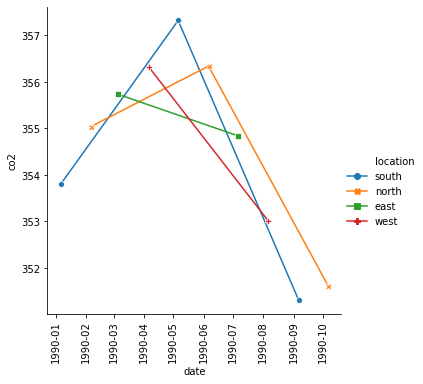

In [12]:
sns.relplot(x='date', y='co2', data=nineties_top10, kind='line', hue='location', style='location', markers=True, dashes = False)
plt.xticks(rotation=90)

#### 2.3.1 Multiple Observations per x-value

In [10]:
# If a line plot is given multiple observations per x-value it will aggregate them (default = mean)
nineties_multiple_x_values = pd.read_csv('Datasets/climate_change_90s_top10.csv')
nineties_multiple_x_values.drop(columns='Unnamed: 0', inplace=True)
nineties_multiple_x_values

,date,co2,relative_temp,location
0,1990-01-06,353.80,0.41,south
1,1990-02-06,355.04,0.41,north
2,1990-03-06,355.73,0.76,east
3,1990-04-06,356.32,0.55,west
4,1990-01-06,353.80,0.41,south
5,1990-01-06,353.80,0.41,south
6,1990-01-06,353.80,0.41,south
7,1990-02-06,355.04,0.41,north
8,1990-02-06,355.04,0.41,north
9,1990-02-06,355.04,0.41,north


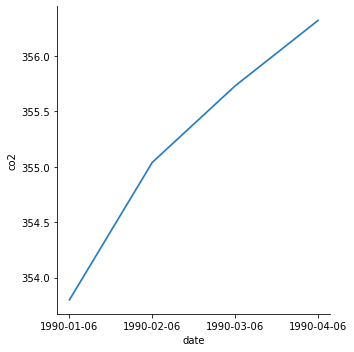

In [11]:
sns.relplot(x='date', y='co2', data=nineties_multiple_x_values, kind='line', ci='sd')